## ĐỒ ÁN CUỐI KÌ


Họ tên: Huỳnh Thanh Sang

MSSV: 1712718

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Lấy dữ liệu

Dữ liệu sử dụng trong đồ án này là file "beer_reviews.csv" đây là dữ liệu đánh giá về bia từ BeerAdvocates. Đây là dataset được thảo luận trong buổi nói chuyện "How to hire and test for data skills: A one-size-fits-all interview kit" từ https://conferences.oreilly.com/strata/strata-ny-2017/public/schedule/detail/59542. Dữ liệu lớn nên không thể upload lên github nên mình sẽ để link [ở đây](https://www.kaggle.com/rdoume/beerreviews)


## Khám phá dữ liệu

In [2]:
beer_reviews_df = pd.read_csv("beer_reviews.csv")
beer_reviews_df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


Dữ liệu có 1586614 dòng và 13 cột

## Ý nghĩa của mỗi dòng và cột

+ Mỗi dòng là một đánh giá của từng người về một loại bia nhất định nào đó.
+ Ý nghĩa mỗi cột:
    - **brewery_id**: Số ID của nhà máy sản xuất bia.
    - **brewery_name**: Tên nhà máy ứng với id của nhà máy.
    - **review_time**: Ngày review.
    - **review_overall**: Điểm review tổng thể của bia.
    - **review_aroma**: Điểm review về mùi thơm của bia.
    - **review_appearance**: Điểm review về bề ngoài của chai bia.
    - **review_profilename**: Tên profile của người review.
    - **beer_style**: Phong cách của bia :)).
    - **review_palate**: Điểm cho cảm giác của bia để lại trên vòm miệng.
    - **review_taste**: Điểm cho vị của bia.
    - **beer_name**: Tên của bia.
    - **beer_abv**: Nồng độ cồn của bia.
    - **beer_beerid**: Số ID của bia

## Kiểu dữ liệu và số lượng giá trị khác rỗng mỗi cột

In [3]:
beer_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


Các cột dạng categorical là: brewery_name, review_profilename, beer_style, beer_name.Các cột còn là là brewery_id, review_time, review_overall, review_aroma, review_appearance, review_palate, review_taste, beer_abv, beer_beerid.

## Số lượng giá trị thiếu mỗi cột

In [4]:
beer_reviews_df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

## Tiền xử lí dữ liệu

**Chuyển đổi kiểu giá trị cột review_time về dạng datetime**

Ta thấy cột review_time đang có kiểu dữ liệu là int64 và chúng ta sẽ không biết được ngày mà reviewer làm bài đánh giá

In [5]:
beer_reviews_df.review_time = pd.to_datetime (beer_reviews_df.review_time,unit = 's')

**Xóa các dòng bị thiếu giá trị**

In [6]:
beer_reviews_df=beer_reviews_df.dropna()

**Xóa các dòng bị trùng**

Ở đây chúng ta phải xóa các dòng bị trùng vì có thể người đánh giá đã đánh giá nhiều lần để giữ thứ hạng cho dòng bia mà mình yêu thích.

In [7]:
beer_reviews_df = beer_reviews_df.sort_values("review_overall",ascending=False)
beer_reviews_df = beer_reviews_df.drop_duplicates(subset = ['review_profilename','beer_beerid'],keep='first')
beer_reviews_df = beer_reviews_df.drop_duplicates(subset = ['review_profilename','beer_name'],keep='first')

In [8]:
beer_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 1586613 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1496263 non-null  int64         
 1   brewery_name        1496263 non-null  object        
 2   review_time         1496263 non-null  datetime64[ns]
 3   review_overall      1496263 non-null  float64       
 4   review_aroma        1496263 non-null  float64       
 5   review_appearance   1496263 non-null  float64       
 6   review_profilename  1496263 non-null  object        
 7   beer_style          1496263 non-null  object        
 8   review_palate       1496263 non-null  float64       
 9   review_taste        1496263 non-null  float64       
 10  beer_name           1496263 non-null  object        
 11  beer_abv            1496263 non-null  float64       
 12  beer_beerid         1496263 non-null  int64         
dtypes: datet

**Loại bỏ điểm outlier**

In [9]:
round(beer_reviews_df.describe(),2) #Làm tròn 2 chữ số thập phân 

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00
mean,3068.78,3.83,3.75,3.85,3.75,3.80,7.05,21445.02
std,5541.95,0.72,0.70,0.61,0.68,0.73,2.33,21800.60
min,1.00,0.00,1.00,0.00,1.00,1.00,0.01,5.00
25%,141.00,3.50,3.50,3.50,3.50,3.50,5.20,1655.00
50%,413.00,4.00,4.00,4.00,4.00,4.00,6.50,12962.00
75%,2250.00,4.50,4.00,4.00,4.00,4.50,8.50,39286.00
max,28003.00,5.00,5.00,5.00,5.00,5.00,57.70,77316.00


Ta thấy trong phần đánh giá điểm thì thang điểm sẽ được giới hạn trong [1:5] nhưng ta thấy trong cột review_overall và cột review_appearance có giá trị min là 0.00 nên ta cần loại bỏ những điểm outlier này.

In [10]:
beer_reviews_df = beer_reviews_df.loc[(beer_reviews_df.review_overall>=1) & (beer_reviews_df.review_appearance>=1)]

In [11]:
round(beer_reviews_df.describe(),2)

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1496256.00,1496256.00,1496256.00,1496256.00,1496256.00,1496256.00,1496256.00,1496256.00
mean,3068.78,3.83,3.75,3.85,3.75,3.80,7.05,21445.10
std,5541.96,0.72,0.70,0.61,0.68,0.73,2.33,21800.62
min,1.00,1.00,1.00,1.00,1.00,1.00,0.01,5.00
25%,141.00,3.50,3.50,3.50,3.50,3.50,5.20,1655.00
50%,413.00,4.00,4.00,4.00,4.00,4.00,6.50,12962.00
75%,2250.00,4.50,4.00,4.00,4.00,4.50,8.50,39286.00
max,28003.00,5.00,5.00,5.00,5.00,5.00,57.70,77316.00


**Sau khi xóa các điểm outlier thì dữ liệu còn lại các giá trị nằm trong đoạn từ [1:5]**

In [12]:
num_cols = beer_reviews_df.shape[1]
num_rows = beer_reviews_df.shape[0]

print("Kết thúc giai đoạn tiền xử lí")
print("Số dòng: ", num_rows) 
print("Số cột: ", num_cols)

Kết thúc giai đoạn tiền xử lí
Số dòng:  1496256
Số cột:  13


In [13]:
beer_reviews_df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586613,14359,The Defiant Brewing Company,2006-10-04 23:41:59,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.20,33061
1054114,718,Brouwerij Bavik,2006-08-03 11:48:03,5.0,4.0,4.5,BEERchitect,Witbier,4.5,4.0,Wittekerke,5.00,2477
783659,13014,Surly Brewing Company,2011-06-13 13:00:36,5.0,5.0,5.0,deadbody,American Brown Ale,5.0,5.0,Moe's Bender,5.52,58120
783658,13014,Surly Brewing Company,2011-06-27 15:25:22,5.0,5.0,4.0,pdeme,American Brown Ale,4.5,5.0,Moe's Bender,5.52,58120
1182432,10099,Dogfish Head Brewery,2005-12-01 04:09:23,5.0,4.5,4.0,Sayson,American Double / Imperial Stout,4.5,4.0,World Wide Stout,18.00,2392


## Đưa ra câu hỏi

**Lí do chọn data về beer**

Ban đầu mình uống bia chỉ thấy mỗi một vị đắng( đầu tiên chắc là heineken) thật sự là không ngon, nhưng từ khi mình được uống bia đen của san miguel, thì mình đã thấy bia này nó thơm nhưng lại ngọt chứ không đắng như những loại bia khác, nên từ đó mình đã đi uống thử các loại bia khác những loại hay thấy trên quán nhậu thì nhận ra có rất nhiều loại uống vào thơm và không hề đắng. Từ đó qua bài này mình muốn gửi tới các bạn những loại bia khác trên thế giới. 

**Câu hỏi:**
+ 5 loại bia được đánh giá tổng thế cao nhất.
+ Độ ngon của bia có phụ thuộc qua vẻ bề ngoài chai bia?
+ Bia có nồng độ cồn cao thì càng ngon?

## Trả lời câu hỏi

**Câu hỏi 1: 5 loại bia được đánh giá tổng thế cao nhất**

In [14]:
beer_name_overall = beer_reviews_df.groupby(beer_reviews_df['beer_name'])['review_overall'].agg(['mean', 'size'])
beer_name_overall.sort_values('mean', ascending = False)

,mean,size
beer_name,,
Kringle's Imperial Stout,5.0,1
Pioneer American Lager,5.0,1
Bert's Best Bitter,5.0,1
Engelbert Moonbeam,5.0,1
BerlinerWeisster-WeissterBerliner,5.0,1
...,...,...
Ndovu Special Malt,1.0,2
Ginja,1.0,1
Brown Lager,1.0,1


Như ta thấy ở bảng trên thì có một số loại bia chỉ được đánh giá 1 lần và được 5.0 điểm điều này sẽ làm chúng ta không đánh giá được khách quan nhất, vì vậy ở đây ta sẽ lấy các loại bia đã được đánh giá từ 500 lần trở lên để lấy chính xác hơn.

In [15]:
beer_name_overall_2 = beer_name_overall.sort_values('size', ascending = False)
beer_name_overall_2 = beer_name_overall_2[beer_name_overall_2['size'] >= 500]
beer_name_overall_2 = beer_name_overall_2.sort_values('mean', ascending = False)
beer_name_overall_2 = beer_name_overall_2[:5]
beer_name_overall_2

,mean,size
beer_name,,
Trappist Westvleteren 12,4.617925,1272
Pliny The Younger,4.600507,592
Pliny The Elder,4.598273,2432
Founders CBS Imperial Stout,4.597087,618
Weihenstephaner Hefeweissbier,4.517683,1951


**Kết quả**

Sau khi xử lí dữ liệu ta có được top 5 loại bia như bảng trên là:

+ **Trappist Westvleteren 12**
+ **Pliny The Younger**
+ **Pliny The Elder**
+ **Founders CBS Imperial Stout**	
+ **Weihenstephaner Hefeweissbier**

**Câu hỏi 2: Những chai bia có vẻ ngoài hào nhoàng, đẹp đẽ thì có thơm và ngon hay không?**

                    mean
review_overall          
1.0             1.909226
1.5             2.200752
2.0             2.606241
2.5             2.927525
3.0             3.242010
3.5             3.589049
4.0             3.879689
4.5             4.124031
5.0             4.330920


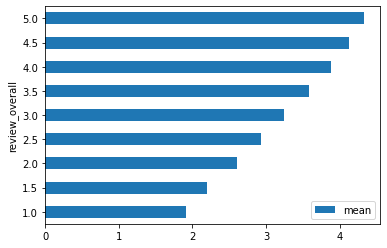

In [16]:
review_aroma_overall = beer_reviews_df.groupby(beer_reviews_df['review_overall'])['review_aroma'].agg(['mean'])
print(review_aroma_overall)
review_aroma_overall.plot.barh()

**Theo như bar chart thì các loại bia được đánh giá là 5.0 và 4.5 điểm thì thường có 1 cái vẻ ngoài là đẹp cho 1 chai bia. Nhưng liệu nó có đúng không?**

In [17]:
review_aroma_overall_2 = beer_reviews_df.groupby(beer_reviews_df['review_aroma'])['review_overall'].value_counts()
a = review_aroma_overall_2[5.0] + review_aroma_overall_2[4.5]
print(a)

review_overall
1.0       125
1.5       178
2.0       846
2.5      1802
3.0      7017
3.5     24216
4.0    110792
4.5    125095
5.0     53258
Name: review_overall, dtype: int64


Series trên là số lượng của mỗi thang điểm tổng thể cho điểm đánh giá bề ngoài là 4.5 và 5.0. Như đã nói ở trên thì bia có điểm đánh giá 4.5 và 5.0 sẽ được đánh giá là thơm và ngon, nên ở đây ta sẽ so sánh tỉ lệ giữa phần bia được 4.5 và 5.0 điểm với điểm aroma là 4.5 và 5.0 và phàn còn lại.

In [18]:
grades = np.sort(beer_reviews_df['review_overall'].unique())
sum1 = 0
sum2 = 0
for grade in grades:
    if(grade <= 4.0):
        sum1 += a[grade]
    else:
        sum2 += a[grade]

print('Tỉ lệ: ',(sum2/(sum2 + sum1)))


Tỉ lệ:  0.5516146092679592


Ở đây ta thấy tỉ lệ của bia có điểm aroma bằng 4.5, 5.0 và điểm overall bằng 4.5, 5.0 với tổng các loại có điểm aroma bằng 4.5, 5.0 là 0.55 nên ta có câu trả lời.

**Độ ngon của bia không phụ thuôc vào bề ngoài của bia vì ở đây chênh lệch không quá lớn, nếu tỉ lệ rơi vào khoảng 0.65 trở lên thì ta có thể nói là độ ngon của bia phụ thuộc vào bề ngoài.**

**Câu hỏi 3: Bia có nồng độ cồn cao thì càng ngon?**

In [19]:
beer_abv_overall = beer_reviews_df.groupby(beer_reviews_df['review_overall'])['beer_abv'].agg(['mean'])
print(beer_abv_overall)

abv = beer_reviews_df['beer_abv'].unique()

                    mean
review_overall          
1.0             6.526774
1.5             6.187221
2.0             6.327678
2.5             6.394533
3.0             6.489598
3.5             6.876483
4.0             7.161656
4.5             7.395192
5.0             7.459856


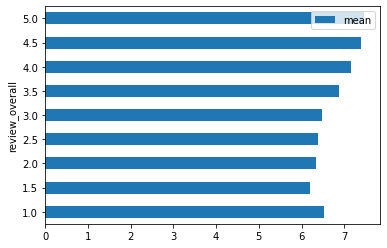

In [20]:
beer_abv_overall.plot.barh()

Theo trên bảng và bar chart ta thấy các loại bia được đánh giá từ 4.5 trở lên có nồng độ cồn trung bình là từ 7.3 trở lên

In [21]:
abv = np.sort(np.round(abv, 1))
abv = np.unique(abv)
print(abv)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.7  0.8  0.9  1.   1.2  1.3  1.4  1.5
  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.
  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8
  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2
  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6
  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.
 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4
 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8
 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.3
 14.5 14.6 14.7 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.9 16.  16.1
 16.2 16.3 16.4 16.5 16.8 16.9 17.  17.2 17.4 17.5 18.  18.1 18.2 18.3
 18.4 18.5 19.2 19.4 19.5 20.  21.  21.9 22.  24.  25.  26.  27.  28.
 29.  30.9 32.  39.  39.4 41.  43.  57.7]


Ta thấy ở trên là bảng các nồng độ cồn của từng loại bia đã được làm tròn 1 chữ số thập phân sau dấu phẩy. Và thật ngạc nhiên khi các loại bia có rất nhiều nồng độ cồn khác nhau nên ở đây mình sẽ không biết nồng độ cồn như thế nào là cao nên mình sẽ lấy 1 mốc là **từ 7 độ trở lên** thì bia sẽ được tính là có **nồng độ cồn cao**. Vì các loại bia ở việt nam các quán nhậu hay sử dụng thường có nồng độ cồn dưới 7 độ.

In [22]:
beer_abv_overall_2 = beer_reviews_df.groupby(beer_reviews_df['beer_abv'] > 7.0)['review_overall'].value_counts()
# beer_abv_overall_2.sort_values('mean')
beer_abv_overall_2 = beer_abv_overall_2[True]
print(beer_abv_overall_2)

review_overall
4.0    235546
4.5    146077
3.5    102775
3.0     44293
5.0     41686
2.5     14669
2.0      9227
1.0      2995
1.5      2941
Name: review_overall, dtype: int64


**Thật ngạc nhiên, ở giá trị bia có nồng độ cồn trở lên lại không có điểm đánh giá tổng quan 5.0 ở đây mà chỉ có 4.5, nên nhìn sơ ta có thể thấy tỉ lệ bia ngon và nồng độ cao thấp hơn nhiều so với tổng số có nồng độ cồn trên 7 độ.**

In [23]:
abv_45 = beer_abv_overall_2[4.5]
abv_70 = beer_abv_overall_2.sum()
print("Tỉ lệ: ", abv_45 / abv_70)

Tỉ lệ:  0.2433768903831832


Trả lời:

**Bia có nồng độ trên 7 độ thì không ngon và uống bia rồi thì không nên lái xe nha các bạn.**

Mà sẵn tiện Việt Nam mới áp dụng xử phạt thổi nồng độ cồn cho người lái xe máy nói riêng và các phương tiện giao thông nói chung, thi ta sẽ làm một số khảo sát nhỏ cho loại bia có nồng độ cồn dưới 1 thử xem là nó có ngon hay không?

In [24]:
beer_abv_overall_3 = beer_reviews_df.groupby(beer_reviews_df['beer_abv'] < 1.0)['review_overall'].value_counts()
beer_abv_overall_3 = beer_abv_overall_3[True]

In [25]:
abv_45_50 = beer_abv_overall_3[4.5] + beer_abv_overall_3[5.0]
abv_10 = beer_abv_overall_3.sum()

print("Tỉ lệ: ", abv_45_50 / abv_10)

Tỉ lệ:  0.04259438528557599


Sự thật là các loại bia dưới 1.0 độ thì không được đánh giá cao rồi các, vậy nên nếu các bạn muốn thưởng thức hương vị bia thật sự thì không uống các loại bia dưới 1.0. Còn nếu uống với bạn với bè thì hãy nên uống các loại bia 0 độ cồn luôn.
**Hãy lái xe an toàn, sau khi uống nha các bạn.**